# 作業目標:
    運用 Keras 模組建構CNN, 了解 CNN 的架構
    
    

# 作業重點
(1)嘗試比對 Dense 與 layers.Conv2D 架構NN 的差異

(2) 有沒有Pooling layer, 對於參數量的差異

注意: input_shape 請勿修改

In [1]:
#導入相關模組
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

#確認keras 版本
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [2]:
'''
model = Sequential([
    Dense(xxx),
    Activation(xxx),
    Dense(xxx),
    Activation(xxx),
])
'''
model = Sequential([
    Dense(100,input_shape=(28*28,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# layers.Conv2D 模型, 用作比對

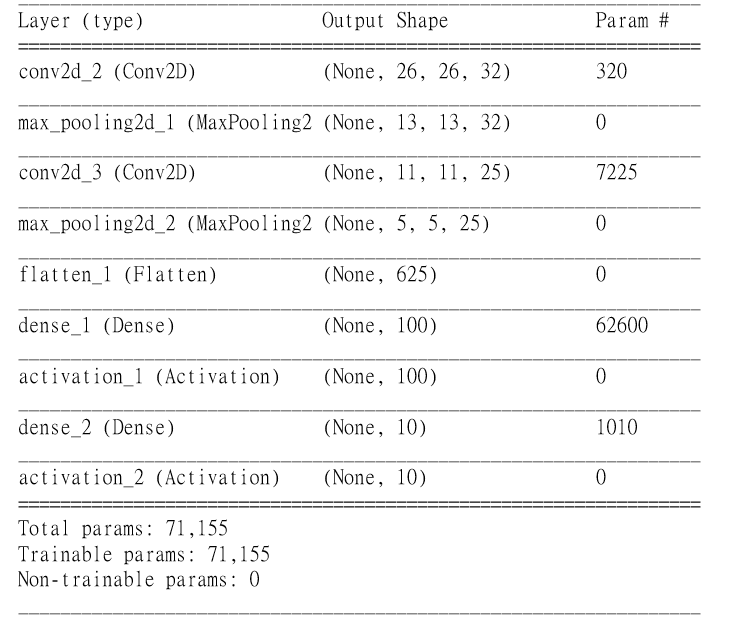



In [3]:
'''
#建立一個序列模型
model = models.Sequential()
#建立兩個卷績層, 32 個內核, 內核大小 3x3, 
#輸入影像大小 28x28x1

#建立一個全連接層
model.add(Dense(units=100))
model.add(Activation('relu'))

#建立一個輸出層, 並採用softmax
model.add(Dense(units=10))
model.add(Activation('softmax'))
'''
model = models.Sequential()
#建立兩個卷績層, 32 個內核, 內核大小 3x3, 
#輸入影像大小 28x28x1
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3)))

#新增平坦層
model.add(Flatten())

#建立一個全連接層
model.add(Dense(units=100))
model.add(Activation('relu'))

#建立一個輸出層, 並採用softmax
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1843300   
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)               

In [4]:
model = models.Sequential()
#建立兩個卷績層, 32 個內核, 內核大小 3x3, 
#輸入影像大小 28x28x1
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3)))

#新增一池化層, 採用maxpooling
model.add(MaxPooling2D(2,2))

#新增平坦層
model.add(Flatten())

#建立一個全連接層
model.add(Dense(units=100))
model.add(Activation('relu'))

#建立一個輸出層, 並採用softmax
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               460900    
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               